# Importing Libraries

In [226]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import cv2

## Reading the Image of Metal

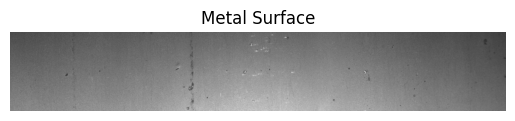

In [231]:
image_path = 'Image Folder/00a0b7730.jpg' 
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Metal Surface')
plt.axis('off')
plt.show()

## Detection of Defects

In [235]:
# Note: Since Image doesnt have annotation of pixel boundary so where my defects presents

### 1. Pre-processing

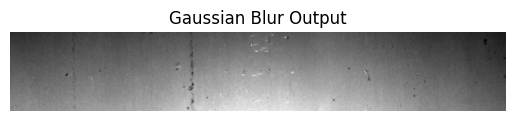

In [238]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blur, cmap='gray')
plt.title('Gaussian Blur Output') #This smoothens the image, reducing noise and making edge detection more effective.
plt.axis('off')
plt.show()


### 2. Edge Detection

In [241]:
# Doing the Edge detection which helps to acts as sudden change in intensity with white line(pts)
# This white represents defected area (Region of Interest)

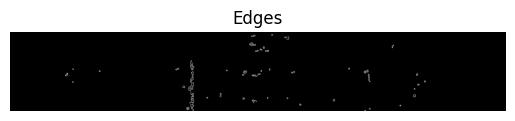

In [243]:
edges = cv2.Canny(blur, threshold1=30, threshold2=100)

plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')
plt.show()

### 3. Filter-> Dilation

In [246]:
# Thickens the edges to form more complete contours around the defects.

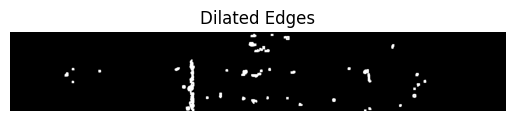

In [248]:
dilated = cv2.dilate(edges, None, iterations=2)

plt.imshow(dilated, cmap='gray')
plt.title('Dilated Edges')
plt.axis('off')
plt.show()

### 4. Contours tracing

In [251]:
# Finds all the continuous curves or shapes (defects) in the image.

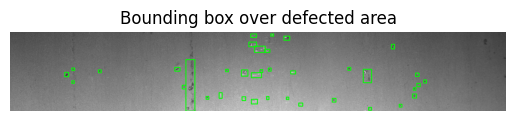

Number of defects found: 37
Defect 1: Approximate area = 64.00 pixels
Defect 2: Approximate area = 57.50 pixels
Defect 3: Approximate area = 85.00 pixels
Defect 4: Approximate area = 176.00 pixels
Defect 5: Approximate area = 104.00 pixels
Defect 6: Approximate area = 49.00 pixels
Defect 7: Approximate area = 97.00 pixels
Defect 8: Approximate area = 56.00 pixels
Defect 9: Approximate area = 60.00 pixels
Defect 10: Approximate area = 124.00 pixels
Defect 11: Approximate area = 131.00 pixels
Defect 12: Approximate area = 49.00 pixels
Defect 13: Approximate area = 108.50 pixels
Defect 14: Approximate area = 84.00 pixels
Defect 15: Approximate area = 47.00 pixels
Defect 16: Approximate area = 65.50 pixels
Defect 17: Approximate area = 88.50 pixels
Defect 18: Approximate area = 265.00 pixels
Defect 19: Approximate area = 129.00 pixels
Defect 20: Approximate area = 114.00 pixels
Defect 21: Approximate area = 260.00 pixels
Defect 22: Approximate area = 60.50 pixels
Defect 23: Approximate are

In [253]:
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

defect_sizes = []
defect_count = 0

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 30:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        defect_sizes.append(area)
        defect_count += 1

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Bounding box over defected area')
plt.axis('off')
plt.show()

cv2.imwrite('Edge_Dilation.jpg', image_rgb)

print(f"Number of defects found: {defect_count}")
for i, size in enumerate(defect_sizes, 1):
    print(f"Defect {i}: Approximate area = {size:.2f} pixels")

## Lets try to do more accurate boundary box over defected region of interest

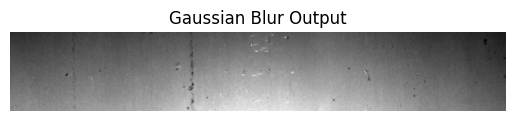

************************************************************************************


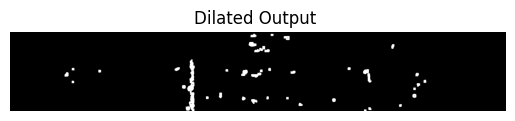

In [259]:
plt.imshow(blur, cmap='gray')
plt.title('Gaussian Blur Output') #This smoothens the image, reducing noise and making edge detection more effective.
plt.axis('off')
plt.show()

print('*******'*12)

plt.imshow(dilated, cmap='gray')
plt.title('Dilated Output ')
plt.axis('off')
plt.show()

### AdaptiveThreshold + Morphological operations

In [263]:
# Adaptive thresholding to isolate defects
# Morphological operations to clean up the binary image

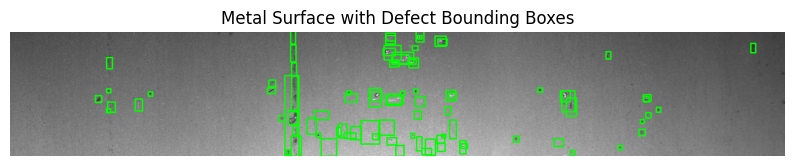

Number of defects found: 48
Defect 1: Approximate area = 52.00 pixels
Defect 2: Approximate area = 50.50 pixels
Defect 3: Approximate area = 51.00 pixels
Defect 4: Approximate area = 56.00 pixels
Defect 5: Approximate area = 67.50 pixels
Defect 6: Approximate area = 86.00 pixels
Defect 7: Approximate area = 61.00 pixels
Defect 8: Approximate area = 144.50 pixels
Defect 9: Approximate area = 70.00 pixels
Defect 10: Approximate area = 228.00 pixels
Defect 11: Approximate area = 55.00 pixels
Defect 12: Approximate area = 53.50 pixels
Defect 13: Approximate area = 81.50 pixels
Defect 14: Approximate area = 64.00 pixels
Defect 15: Approximate area = 91.00 pixels
Defect 16: Approximate area = 180.00 pixels
Defect 17: Approximate area = 86.00 pixels
Defect 18: Approximate area = 133.50 pixels
Defect 19: Approximate area = 70.00 pixels
Defect 20: Approximate area = 67.50 pixels
Defect 21: Approximate area = 57.50 pixels
Defect 22: Approximate area = 231.50 pixels
Defect 23: Approximate area = 

In [267]:

thresh = cv2.adaptiveThreshold(
    blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

kernel = np.ones((3, 3), np.uint8)
morph = cv2.dilate(thresh, kernel, iterations=1)
morph = cv2.erode(morph, kernel, iterations=1)

contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()

defect_count = 0
defect_sizes = []

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 50:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
        defect_count += 1
        defect_sizes.append(area)

output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(output_rgb)
plt.axis('off')
plt.title('Metal Surface with Defect Bounding Boxes')
plt.show()

cv2.imwrite('AdaptiveThreshold_Morphological_operations.jpg', output_rgb)

print(f"Number of defects found: {defect_count}")
for i, size in enumerate(defect_sizes, 1):
    print(f"Defect {i}: Approximate area = {size:.2f} pixels")


### Clustering nearest/overlap defected bounding box with DBSCAN

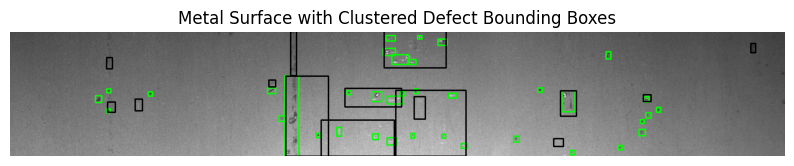

Saved as 'output_clustered_boxes.jpg'

Number of individual defects found: 48
Defect 1: Approximate area = 52.00 pixels
Defect 2: Approximate area = 50.50 pixels
Defect 3: Approximate area = 51.00 pixels
Defect 4: Approximate area = 56.00 pixels
Defect 5: Approximate area = 67.50 pixels
Defect 6: Approximate area = 86.00 pixels
Defect 7: Approximate area = 61.00 pixels
Defect 8: Approximate area = 144.50 pixels
Defect 9: Approximate area = 70.00 pixels
Defect 10: Approximate area = 228.00 pixels
Defect 11: Approximate area = 55.00 pixels
Defect 12: Approximate area = 53.50 pixels
Defect 13: Approximate area = 81.50 pixels
Defect 14: Approximate area = 64.00 pixels
Defect 15: Approximate area = 91.00 pixels
Defect 16: Approximate area = 180.00 pixels
Defect 17: Approximate area = 86.00 pixels
Defect 18: Approximate area = 133.50 pixels
Defect 19: Approximate area = 70.00 pixels
Defect 20: Approximate area = 67.50 pixels
Defect 21: Approximate area = 57.50 pixels
Defect 22: Approximate a

In [277]:
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

defect_centers = []
bounding_boxes = []
defect_sizes = []

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 50:
        x, y, w, h = cv2.boundingRect(contour)
        cx, cy = x + w // 2, y + h // 2
        defect_centers.append([cx, cy])
        bounding_boxes.append((x, y, w, h))
        defect_sizes.append(area)

output = image.copy()

if defect_centers:
    defect_centers = np.array(defect_centers)
    db = DBSCAN(eps=50, min_samples=1).fit(defect_centers)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    cluster_areas = []
    for cluster_label in range(n_clusters):
        cluster_indices = np.where(labels == cluster_label)[0]
        cluster_bboxes = [bounding_boxes[i] for i in cluster_indices]

        x_min = min([bbox[0] for bbox in cluster_bboxes])
        y_min = min([bbox[1] for bbox in cluster_bboxes])
        x_max = max([bbox[0] + bbox[2] for bbox in cluster_bboxes])
        y_max = max([bbox[1] + bbox[3] for bbox in cluster_bboxes])

        cv2.rectangle(output, (x_min, y_min), (x_max, y_max), (0, 0, 0), 2)

        cluster_area = (x_max - x_min) * (y_max - y_min)
        cluster_areas.append(cluster_area)

    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(output_rgb)
    plt.axis('off')
    plt.title('Metal Surface with Clustered Defect Bounding Boxes')
    plt.show()

    cv2.imwrite('output_clustered_boxes.jpg', output)
    print("Saved as 'output_clustered_boxes.jpg'")

    print(f"\nNumber of individual defects found: {len(defect_sizes)}")
    for i, area in enumerate(defect_sizes, 1):
        print(f"Defect {i}: Approximate area = {area:.2f} pixels")

    print(f"\nNumber of clusters (black bounding boxes) drawn: {n_clusters}")
    for i, area in enumerate(cluster_areas, 1):
        print(f"Cluster {i}: Bounding box area = {area} pixels")

else:
    print("No defects detected after filtering.")
